# Data Cleaning and Preparing

Jerry Gu, Tara Morin, Rithwik Raman


[Dataset](https://www.kaggle.com/datasets/zsetash/virginia-public-schools?resource=download)



# DATA CLEANING

In [ ]:
import pandas as pd
import os
import numpy as np
from functools import reduce
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

# Mount Google Drive and set the directory path
drive.mount('/content/gdrive')
dir_path = '/content/gdrive/MyDrive/ML/'


Mounted at /content/gdrive


***EXTRACT DEMOGRAPHICS SECTION***

In [ ]:
#---------- EXTRACT DISABILITIES
initial_disabilities_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Students_with_Disabilities.csv")))

# Drop unnecessary columns
initial_disabilities_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)

# Rename 'School Name' to 'School' for consistency
initial_disabilities_df.rename(columns={'School Name': 'School'}, inplace=True)

# Remove commas and convert to numeric, handling NaN values
initial_disabilities_df['Total Count'] = pd.to_numeric(initial_disabilities_df['Total Count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

initial_disabilities_df.head()
pivot_df = initial_disabilities_df.pivot_table(
    index=['School'],
    columns='Disabled',
    values='Total Count',
    aggfunc='sum'
).reset_index()

# Rename columns for clarity
pivot_df.columns = ['School', 'Not Disabled', 'Disabled']

# Calculate percentage of disabled students
pivot_df['% Disabled'] = (pivot_df['Disabled'] /
                          (pivot_df['Not Disabled'] + pivot_df['Disabled'])) * 100

# Drop intermediate columns if needed, and keep only the school and percentage
disabilities_df = pivot_df[['School', '% Disabled']]

# print(disabilities_df.head())
# print(disabilities_df.describe())

In [ ]:
#---------- EXTRACT RACE
initial_race_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Race.csv")))
initial_race_df.columns = [
    "Division Name",
    "School Name",
    "Race",
    "Total Count",
    "Percentage",
    "Sch_Div"
]
initial_race_df = initial_race_df.drop(columns=["Division Name", "Sch_Div"])

# Remove commas and convert 'Total Count' to numeric
initial_race_df["Total Count"] = pd.to_numeric(
    initial_race_df["Total Count"].astype(str).str.replace(",", ""), errors="coerce"
).fillna(0).astype(int)

# Pivot the table to calculate counts for each race category per school
pivot_race_df = initial_race_df.pivot_table(
    index=["School Name"],
    columns="Race",  # Using 'Race' as the pivot column
    values="Total Count",
    aggfunc="sum"
).reset_index()

pivot_race_df["Total Students"] = pivot_race_df.iloc[:, 1:].sum(axis=1)

# Calculate percentage of each race category
for col in pivot_race_df.columns[1:-1]:  # Exclude 'School Name' and 'Total Students'
    pivot_race_df[f"% {col}"] = (pivot_race_df[col] / pivot_race_df["Total Students"]) * 100

# Drop intermediate columns and keep percentages
percentage_cols = [col for col in pivot_race_df.columns if col.startswith("%")]
race_df = pivot_race_df[["School Name"] + percentage_cols]

race_df = race_df.fillna(0)

race_df.rename(columns={'School Name': 'School'}, inplace=True)

race_df.head()

Race,School,% American Indian or Alaska Native,% Asian,"% Black, not of Hispanic origin",% Hispanic,% Native Hawaiian or Pacific Islander,"% Non-Hispanic, two or more races","% White, not of Hispanic origin"
0,A. Henderson Elementary,0.126904,11.421320,20.685279,22.969543,0.761421,10.532995,33.502538
1,A.G. Richardson Elementary,0.369004,0.369004,11.808118,14.575646,0.000000,9.040590,63.837638
2,A.M. Davis Elementary,0.140449,4.213483,35.252809,34.269663,0.280899,5.898876,19.943820
3,A.S. Rhodes Elementary,0.000000,0.746269,2.985075,8.955224,0.000000,9.701493,77.611940
4,A.W.E. Bassette Elementary,0.000000,1.720430,76.774194,4.946237,0.000000,10.322581,6.236559


In [ ]:
#---------- EXTRACT MILITARY CONNECTED

initial_military_connected_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Military_Connected.csv")))

initial_military_connected_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)
initial_military_connected_df.rename(columns={'School Name': 'School'}, inplace=True)

initial_military_connected_df['Total Count'] = pd.to_numeric(
    initial_military_connected_df['Total Count'].str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

# Pivot the table to calculate counts of military-connected and non-military-connected students for each school
pivot_military_df = initial_military_connected_df.pivot_table(
    index=['School'],
    columns='Military',
    values='Total Count',
    aggfunc='sum'
).reset_index()

pivot_military_df.columns = ['School', 'Not Military-Connected', 'Military-Connected']

pivot_military_df['% Military-Connected'] = (
    (pivot_military_df['Military-Connected'] /
     (pivot_military_df['Not Military-Connected'] + pivot_military_df['Military-Connected']))
    * 100
)

military_connected_df = pivot_military_df[['School', '% Military-Connected']]

# military_connected_df.head()
# military_connected_df.describe()

In [ ]:
#---------- EXTRACT HOMELESS
homeless_connected_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Homeless.csv")))

homeless_connected_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)
homeless_connected_df.rename(columns={'School Name': 'School'}, inplace=True)


homeless_connected_df['Total Count'] = pd.to_numeric(
    homeless_connected_df['Total Count'].str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

pivot_homeless_df = homeless_connected_df.pivot_table(
    index=['School'],
    columns='Homeless',
    values='Total Count',
    aggfunc='sum'
).reset_index()


pivot_homeless_df = pivot_homeless_df.fillna(0)
pivot_homeless_df.columns = ['School', 'Not Homeless', 'Homeless']

pivot_homeless_df['% Homeless'] = (
    (pivot_homeless_df['Homeless'] /
     (pivot_homeless_df['Not Homeless'] + pivot_homeless_df['Homeless']))
    * 100
)

# Keep only relevant columns
homeless_df = pivot_homeless_df[['School', '% Homeless']]

# homeless_df.describe()

In [ ]:
#---------- EXTRACT GENDER

gender_connected_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Gender.csv")))

gender_connected_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)
gender_connected_df.rename(columns={'School Name': 'School'}, inplace=True)


# Remove commas and convert 'Total Count' to numeric, replacing invalid values with 0
gender_connected_df['Total Count'] = pd.to_numeric(
    gender_connected_df['Total Count'].astype(str).str.replace(',', ''),
    errors='coerce'  # Treat invalid strings (e.g., blanks) as NaN
).fillna(0).astype(int)


pivot_gender_df = gender_connected_df.pivot_table(
    index=['School'],
    columns='Gender',
    values='Total Count',
    aggfunc='sum'
).reset_index()


pivot_gender_df = pivot_gender_df.fillna(0)

pivot_gender_df['Total Students'] = pivot_gender_df[['Female', 'Male', 'Other']].sum(axis=1)

pivot_gender_df['% Female'] = (pivot_gender_df['Female'] / pivot_gender_df['Total Students']) * 100
pivot_gender_df['% Male'] = (pivot_gender_df['Male'] / pivot_gender_df['Total Students']) * 100
pivot_gender_df['% Other'] = (pivot_gender_df['Other'] / pivot_gender_df['Total Students']) * 100

gender_df = pivot_gender_df[['School', '% Female', '% Male', '% Other']]

In [ ]:
#---------- EXTRACT FOSTER CARE

foster_connected_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Foster_Care.csv")))

foster_connected_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)
foster_connected_df.rename(columns={'School Name': 'School'}, inplace=True)

foster_connected_df['Total Count'] = pd.to_numeric(
    foster_connected_df['Total Count'].astype(str).str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

pivot_foster_df = foster_connected_df.pivot_table(
    index=['School'],
    columns='Foster Care',
    values='Total Count',
    aggfunc='sum'
).reset_index()


pivot_foster_df = pivot_foster_df.fillna(0)


pivot_foster_df.columns = ['School', 'Not in Foster Care', 'In Foster Care']

pivot_foster_df['Total Students'] = pivot_foster_df['Not in Foster Care'] + pivot_foster_df['In Foster Care']
pivot_foster_df['% Not in Foster Care'] = (pivot_foster_df['Not in Foster Care'] / pivot_foster_df['Total Students']) * 100
pivot_foster_df['% In Foster Care'] = (pivot_foster_df['In Foster Care'] / pivot_foster_df['Total Students']) * 100

foster_df = pivot_foster_df[['School', '% In Foster Care']]

# foster_df.head()

In [ ]:
#---------- EXTRACT ENGLISH LEARNERS

initial_english_learners_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "English_Learners.csv")))

initial_english_learners_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)
initial_english_learners_df.rename(columns={'School Name': 'School'}, inplace=True)

initial_english_learners_df['Total Count'] = pd.to_numeric(
    initial_english_learners_df['Total Count'].astype(str).str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

pivot_english_df = initial_english_learners_df.pivot_table(
    index=['School'],
    columns='English Learners',
    values='Total Count',
    aggfunc='sum'
).reset_index()

pivot_english_df = pivot_english_df.fillna(0)

pivot_english_df.columns = ['School', 'Not English Learners', 'English Learners']
pivot_english_df['Total Students'] = pivot_english_df['Not English Learners'] + pivot_english_df['English Learners']


pivot_english_df['% Not English Learners'] = (pivot_english_df['Not English Learners'] / pivot_english_df['Total Students']) * 100
pivot_english_df['% English Learners'] = (pivot_english_df['English Learners'] / pivot_english_df['Total Students']) * 100


english_learners_df = pivot_english_df[['School', '% Not English Learners']]

# english_learners_df.describe()

In [ ]:
#---------- EXTRACT ECONOMIC DATA

initial_disadvantaged_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Economically_Disadvantaged.csv")))
initial_disadvantaged_df.drop(columns=['Division Name', 'Sch_Div'], inplace=True)

initial_disadvantaged_df.rename(columns={'School Name': 'School'}, inplace=True)

initial_disadvantaged_df['Total Count'] = pd.to_numeric(
    initial_disadvantaged_df['Total Count'].astype(str).str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

pivot_disadvantaged_df = initial_disadvantaged_df.pivot_table(
    index=['School'],
    columns='Disadvantaged',
    values='Total Count',
    aggfunc='sum'
).reset_index()

pivot_disadvantaged_df = pivot_disadvantaged_df.fillna(0)

pivot_disadvantaged_df.columns = ['School', 'Not Economically Disadvantaged', 'Disadvantaged']
pivot_disadvantaged_df['Total Students'] = pivot_disadvantaged_df['Not Economically Disadvantaged'] + pivot_disadvantaged_df['Disadvantaged']

pivot_disadvantaged_df['% Not Economically Disadvantaged'] = (pivot_disadvantaged_df['Not Economically Disadvantaged'] / pivot_disadvantaged_df['Total Students']) * 100
pivot_disadvantaged_df['% Disadvantaged'] = (pivot_disadvantaged_df['Disadvantaged'] / pivot_disadvantaged_df['Total Students']) * 100

economically_disadvantaged_df = pivot_disadvantaged_df[['School', '% Not Economically Disadvantaged']]

# economically_disadvantaged_df.describe()

Below data is not in the demographics, so extraction was a bit different

In [ ]:
# ----------- EXTRACT EDUCATION LEVELS

initial_education_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "Education_Level.csv")))
initial_education_df.describe()

# Pivot the data to have each degree type as a separate column for each school
education_df = initial_education_df.pivot_table(
    index=['School', 'Division'],
    columns='Degree_Type',
    values='Degree_Percent',
    fill_value=0
).reset_index()

# Rename columns for clarity
education_df.columns = ['School', 'Division', 'Bachelor_Degree_Percent', 'Doctoral_Degree_Percent', 'Master_Degree_Percent']
education_df.drop(columns=['Division'], inplace=True)
# pivoted_education.head()

In [ ]:
#---------- EXTRACT SCHOOL LONGITUDE/LATITUDE
school_addresses_df = pd.DataFrame(pd.read_csv(os.path.join(dir_path, "School Addresses.csv")))

# drop every column except "school" and "latitude/longitude"
school_addresses_df.drop(columns=['Sch_div', 'Division', 'Street', 'City', 'State', 'Zip'], inplace=True)


# school_addresses_df.head()

***COMBINING ALL OF DATA***

In [ ]:
# -------------------------------- MERGING ALL DATA COLUMNS

# creating df based on SOL pass rate
data_used = ["SOL_Pass_Rate.csv", "Funding.csv", "Experience.csv", "Absenteeism.csv", "Free_and_Reduced_Lunch.csv"]
dataframes = []
for csv_file in data_used:
    file_path = os.path.join(dir_path, csv_file)
    df = pd.read_csv(file_path)

    # Drop Sch_Type and Sch_Div if they exist, since we're only merging on 'School'
    df = df.drop(columns=['Sch_Type', 'Sch_Div', 'Division'], errors='ignore')
    df = df.drop_duplicates(subset=['School'])
    dataframes.append(df)

combined_df = reduce(lambda left, right: pd.merge(left, right, on='School', how='inner'), dataframes)

# Rename Columns for Clarity
combined_df.rename(columns={'Percent Eligible': 'Reduced_Lunch_Eligibility_Percent'}, inplace=True)


In [ ]:
# ------- MERGE PDs

# Merge the pivoted education DataFrame with the combined DataFrame
combined_df = pd.merge(combined_df, education_df, on='School', how='inner')

# Merge longitude and latitude
combined_df = pd.merge(combined_df, school_addresses_df, on='School', how='inner')

# Merge demographics
combined_df = pd.merge(combined_df, disabilities_df, on='School', how='inner')
combined_df = pd.merge(combined_df, race_df, on='School', how='inner')
combined_df = pd.merge(combined_df, military_connected_df, on='School', how='inner')
combined_df = pd.merge(combined_df, homeless_df, on='School', how='inner')
combined_df = pd.merge(combined_df, gender_df, on='School', how='inner')
combined_df = pd.merge(combined_df, foster_df, on='School', how='inner')
combined_df = pd.merge(combined_df, english_learners_df, on='School', how='inner')
combined_df = pd.merge(combined_df, economically_disadvantaged_df, on='School', how='inner')

# print(len(combined_df))
#dropping the rows where latitude and longitude are null
combined_df = combined_df[(combined_df['Longitude'] != 0) & (combined_df['Latitude'] != 0)]
# print(len(combined_df))

***ONE HOT ENCODE SECTION***

In [ ]:
# --- One-hot encode 'Poverty_Level'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for array output
encoded_poverty = pd.DataFrame(enc.fit_transform(combined_df[['Poverty_Level']]))
encoded_poverty.columns = enc.get_feature_names_out(['Poverty_Level']) # Get descriptive column names
combined_df = combined_df.drop('Poverty_Level', axis=1)  # Drop original column
combined_df = pd.concat([combined_df, encoded_poverty], axis=1)


# --- One-hot encode 'Title I Code'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for array output
encoded_title1 = pd.DataFrame(enc.fit_transform(combined_df[['Title1_Code']]))
encoded_title1.columns = enc.get_feature_names_out(['Title1_Code'])  # Get descriptive column names
combined_df = combined_df.drop('Title1_Code', axis=1)  # Drop original column
combined_df = pd.concat([combined_df, encoded_title1], axis=1)

#dropping the 2 null rows created in encoding
combined_df = combined_df.dropna(subset=['SOL Pass Rate'])
# print(len(combined_df))
#dropping where title 1 code is null
combined_df.drop(['Title1_Code_nan'], axis=1, inplace=True)
# print(len(combined_df))

In [ ]:
combined_df.describe()

,SOL Pass Rate,End_of_Year_Average_Daily_Membership,School_Level_Expenditures_Per_Pupil_Federal,School_Level_Expenditures_Per_Pupil_State,Division_Level_Expenditures_Per_Pupil_Federal,Division_Level_Expenditures_Per_Pupil_State,Total_Per_Pupil_Expenditures,Total_Expenditures,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,...,% Male,% Other,% In Foster Care,% Not English Learners,% Not Economically Disadvantaged,Poverty_Level_High Poverty,Poverty_Level_Low Poverty,Poverty_Level_Medium Poverty,Title1_Code_Non-Title I,Title1_Code_Title I
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1.811000e+03,1811.000000,1811.000000,...,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1809.000000,1809.000000,1809.000000,1811.000000,1811.000000
mean,66.883701,687.809431,821.957482,9697.342352,479.207620,3743.231364,14741.716731,9.990693e+06,5.142960,4.312755,...,51.575904,0.031495,0.269627,90.166410,56.550405,0.217800,0.294085,0.488115,0.601877,0.397018
std,15.092162,455.458767,655.807776,3276.383917,404.404913,1560.325631,3613.155522,7.013238e+06,4.624384,5.491415,...,2.374698,0.111199,0.418701,13.853112,19.014741,0.412865,0.455756,0.499997,0.489646,0.489415
min,17.750000,45.710000,0.000000,143.000000,0.000000,0.000000,7751.000000,1.067465e+06,0.000000,0.000000,...,40.217391,0.000000,0.000000,20.196078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.500000,425.095000,352.500000,7644.500000,145.000000,2979.000000,12240.000000,5.774202e+06,2.200000,0.000000,...,50.248762,0.000000,0.000000,88.007523,42.857143,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.500000,584.870000,623.000000,8810.000000,543.000000,3585.000000,13739.000000,8.058106e+06,4.100000,2.500000,...,51.634383,0.000000,0.140252,95.424837,56.119792,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.250000,778.365000,1161.500000,11003.000000,694.000000,4322.000000,16919.000000,1.217128e+07,7.200000,6.200000,...,52.941176,0.000000,0.363306,100.000000,69.035311,0.000000,1.000000,1.000000,1.000000,1.000000
max,99.400000,4352.180000,5231.000000,36469.000000,3624.000000,15694.000000,44478.000000,6.995643e+07,47.100000,41.700000,...,63.025210,2.068966,4.032258,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CORRELATIONS

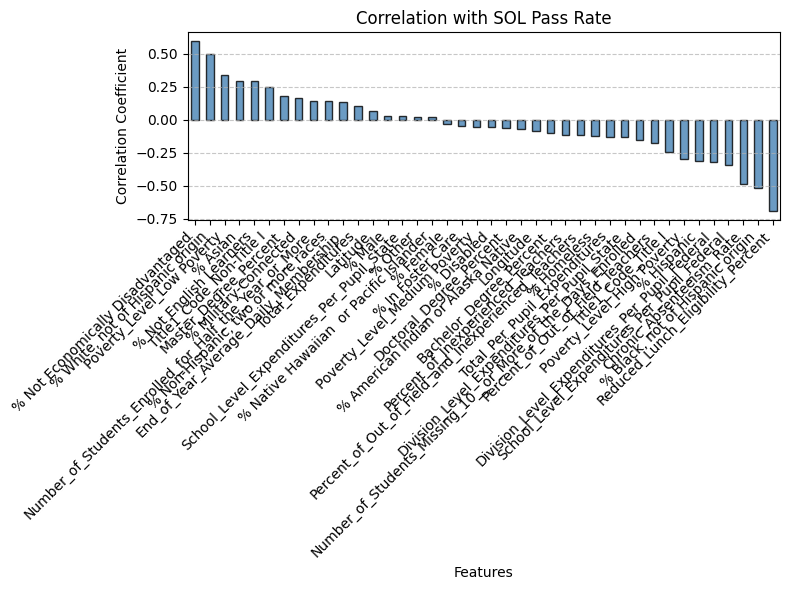

,SOL Pass Rate
% Not Economically Disadvantaged,0.596041
"% White, not of Hispanic origin",0.493671
Poverty_Level_Low Poverty,0.335794
% Asian,0.292936
% Not English Learners,0.292078
Title1_Code_Non-Title I,0.243222
Master_Degree_Percent,0.177944
% Military-Connected,0.165437
Number_of_Students_Enrolled_for_Half_the_Year_or_More,0.141762
"% Non-Hispanic, two or more races",0.140400


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recompute correlation matrix for numerical columns
numerical_df = combined_df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numerical_df.corr()

# Filter to only include correlations with 'SOL Pass Rate'
sol_pass_corr = correlation_matrix['SOL Pass Rate'].drop('SOL Pass Rate').sort_values(ascending=False)

# Plot the correlations with 'SOL Pass Rate'
plt.figure(figsize=(8, 6))
sol_pass_corr.plot(kind='bar', color='steelblue', alpha=0.8, edgecolor='black')
plt.title("Correlation with SOL Pass Rate")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the numerical correlation values
sol_pass_corr


# HEATMAP

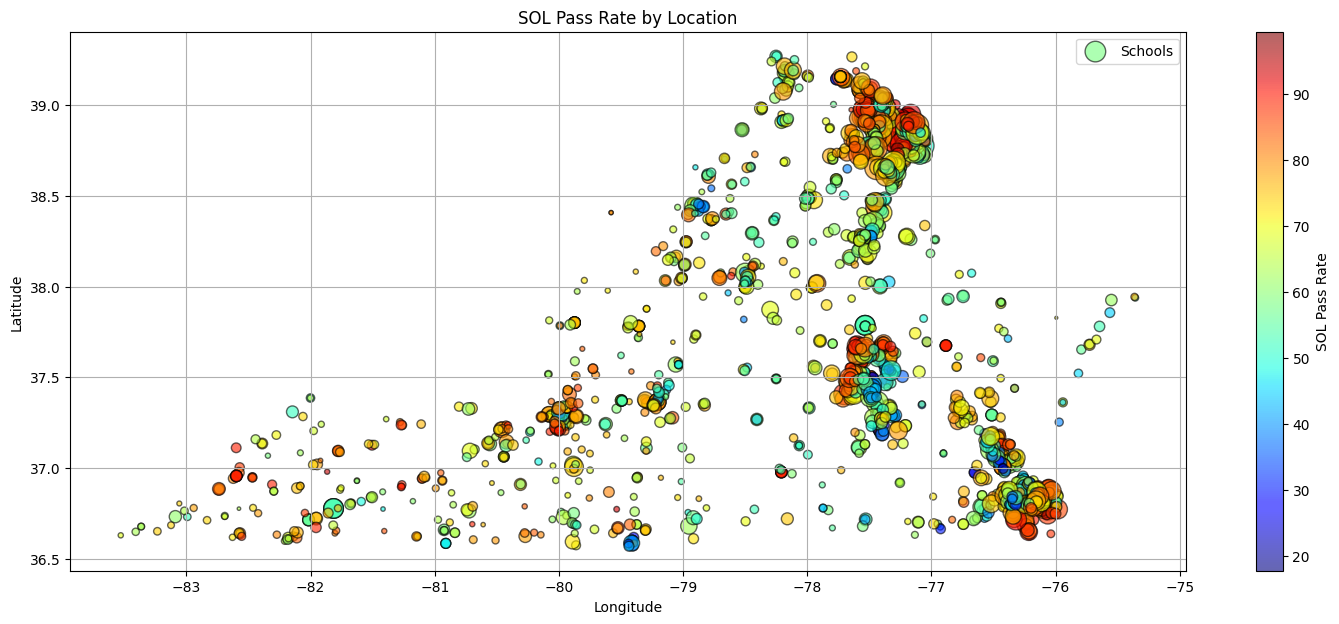

In [ ]:
import matplotlib.pyplot as plt

# Filter rows with (0, 0) coordinates
filtered_df = combined_df[(combined_df['Longitude'] != 0) & (combined_df['Latitude'] != 0)]

# Scatter plot
plt.figure(figsize=(18, 7))
scatter = plt.scatter(
    filtered_df['Longitude'],
    filtered_df['Latitude'],
    s=filtered_df['End_of_Year_Average_Daily_Membership'] / 10,  # Adjust size (e.g., based on school enrollment)
    c=filtered_df['SOL Pass Rate'],
    cmap="jet",
    alpha=0.6,
    edgecolor="k",
    label="Schools"
)

plt.colorbar(scatter, label="SOL Pass Rate")
plt.title("SOL Pass Rate by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()


# LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define the features and target
y = combined_df['SOL Pass Rate']
X = combined_df.drop(['SOL Pass Rate', 'School'], axis=1, errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Transform the test data using the trained imputer


# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse= mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R²: {r2}")

feature_names = X.columns  # Get the feature names from the original DataFrame
weights = model.coef_  # Access the weights (coefficients)
bias = model.intercept_  # Access the bias term

# Create a DataFrame with absolute weight column for sorting
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
weights_df['Abs_Weight'] = weights_df['Weight'].abs()  # Add absolute weight for sorting

# Sort by absolute weight in descending order
weights_df = weights_df.sort_values(by='Abs_Weight', ascending=False).drop(columns='Abs_Weight')

print("Feature Weights (sorted by importance):")
print(weights_df)

print(f"\nBias (Intercept): {bias}")



Linear Regression RMSE: 8.90022796427092
Linear Regression R²: 0.6459895881898678
Feature Weights (sorted by importance):
                                              Feature        Weight
38                            Title1_Code_Non-Title I  3.003650e+00
17                                           Latitude -2.950250e+00
39                                Title1_Code_Title I  2.872218e+00
20                 % American Indian or Alaska Native -1.653474e+00
31                                            % Other  1.239531e+00
24             % Native Hawaiian  or Pacific Islander -1.052125e+00
35                         Poverty_Level_High Poverty  9.288646e-01
21                                            % Asian  8.717244e-01
3       Division_Level_Expenditures_Per_Pupil_Federal -7.770001e-01
1         School_Level_Expenditures_Per_Pupil_Federal -7.766384e-01
4         Division_Level_Expenditures_Per_Pupil_State -7.761150e-01
2           School_Level_Expenditures_Per_Pupil_State -7.76059

# GRADIENT DESCENT

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the features and target
y = combined_df['SOL Pass Rate']
X = combined_df.drop(['SOL Pass Rate', 'School'], axis=1, errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate options
    'eta0': [0.001, 0.01, 0.1],  # Initial learning rate
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization penalties
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],  # Loss functions
    'max_iter': [1000, 2000, 3000],  # Max iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
}

# Initialize the SGDRegressor model
sgd_regressor = SGDRegressor(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(sgd_regressor, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters from the grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Train the best model found by GridSearchCV
best_sgd_regressor = grid_search.best_estimator_

# Predictions
y_pred = best_sgd_regressor.predict(X_test_scaled)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= mse**0.5

print(f"SGD Regression RMSE: {rmse}")
print(f"SGD Regression R²: {r2}")

# Feature Weights
feature_names = X.columns  # Get the feature names from the original DataFrame
weights = best_sgd_regressor.coef_  # Access the weights (coefficients)
bias = best_sgd_regressor.intercept_  # Access the bias term

# Create a DataFrame with absolute weight column for sorting
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
weights_df['Abs_Weight'] = weights_df['Weight'].abs()  # Add absolute weight for sorting

# Sort by absolute weight in descending order
weights_df = weights_df.sort_values(by='Abs_Weight', ascending=False).drop(columns='Abs_Weight')

print("Feature Weights (sorted by importance):")
print(weights_df)

print(f"\nBias (Intercept): {bias}")


Best parameters found: {'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.01}
SGD Regression RMSE: 8.889768627844724
SGD Regression R²: 0.646821148536322
Feature Weights (sorted by importance):
                                              Feature    Weight
13                  Reduced_Lunch_Eligibility_Percent -6.258210
22                    % Black, not of Hispanic origin -3.095641
21                                            % Asian  2.822483
12                           Chronic_Absenteeism_Rate -2.477372
17                                           Latitude -1.899388
26                    % White, not of Hispanic origin  1.844842
33                             % Not English Learners  1.552811
27                               % Military-Connected  0.977575
20                 % American Indian or Alaska Native -0.769167
23                                         % Hispanic -0.652076
10  Number_of_Students_Missing_1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4860 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

# Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Define the features and target as before
y = combined_df['SOL Pass Rate']
X = combined_df.drop(['SOL Pass Rate', 'School'], axis=1, errors='ignore')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV with cross-validation (cv=5 for 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found:", best_params)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse= mse**0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) with best model:", rmse)
print("R² Score with best model:", r2)


Best parameters found: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Root Mean Squared Error (RMSE) with best model: 7.30178005568692
R² Score with best model: 0.7617289557198823


# XGBoost

In [ ]:
# Install XGBoost
# !pip install xgboost

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Preprocess the data
X = combined_df.drop(['SOL Pass Rate', 'School'], axis=1, errors='ignore')
y = combined_df['SOL Pass Rate']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',           # Metric for evaluation
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of trees
    'subsample': 0.8,                # Fraction of samples used per tree
    'colsample_bytree': 0.8          # Fraction of features used per tree
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,          # Maximum number of boosting iterations
    early_stopping_rounds=10,     # Stop if no improvement after 10 rounds
    evals=evals,
    verbose_eval=True             # Print results for every iteration
)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Get the column names
feature_names = X.columns.tolist()

# Map feature names with their importance
importance = xgb_model.get_score(importance_type='weight')  # or 'gain', 'cover'
mapped_importance = {feature_names[int(k[1:])]: v for k, v in importance.items()}

# Sort and display feature importance
sorted_importance = sorted(mapped_importance.items(), key=lambda item: item[1], reverse=True)

print("Feature Importance (sorted):")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")


[0]	train-rmse:14.02875	eval-rmse:13.93882
[1]	train-rmse:13.12790	eval-rmse:13.18786
[2]	train-rmse:12.24784	eval-rmse:12.42502
[3]	train-rmse:11.46109	eval-rmse:11.82528
[4]	train-rmse:10.80127	eval-rmse:11.26838
[5]	train-rmse:10.18714	eval-rmse:10.77605
[6]	train-rmse:9.58741	eval-rmse:10.27754
[7]	train-rmse:9.04930	eval-rmse:9.84636
[8]	train-rmse:8.56863	eval-rmse:9.47053
[9]	train-rmse:8.16902	eval-rmse:9.22736
[10]	train-rmse:7.77408	eval-rmse:9.01023
[11]	train-rmse:7.41125	eval-rmse:8.80254
[12]	train-rmse:7.10368	eval-rmse:8.61375
[13]	train-rmse:6.80007	eval-rmse:8.45094
[14]	train-rmse:6.53701	eval-rmse:8.29677
[15]	train-rmse:6.29905	eval-rmse:8.19342
[16]	train-rmse:6.07663	eval-rmse:8.11116
[17]	train-rmse:5.87276	eval-rmse:8.03761
[18]	train-rmse:5.68677	eval-rmse:7.95350
[19]	train-rmse:5.53317	eval-rmse:7.89321
[20]	train-rmse:5.38422	eval-rmse:7.85727
[21]	train-rmse:5.26450	eval-rmse:7.79544
[22]	train-rmse:5.14771	eval-rmse:7.75866
[23]	train-rmse:5.00971	eval-rm

# K-Means Clustering

<ipython-input-18-71693f52f7d7>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_and_poverty_df['SOL_pass_rate_scaled'] = title_and_poverty_df[['SOL Pass Rate']]/100


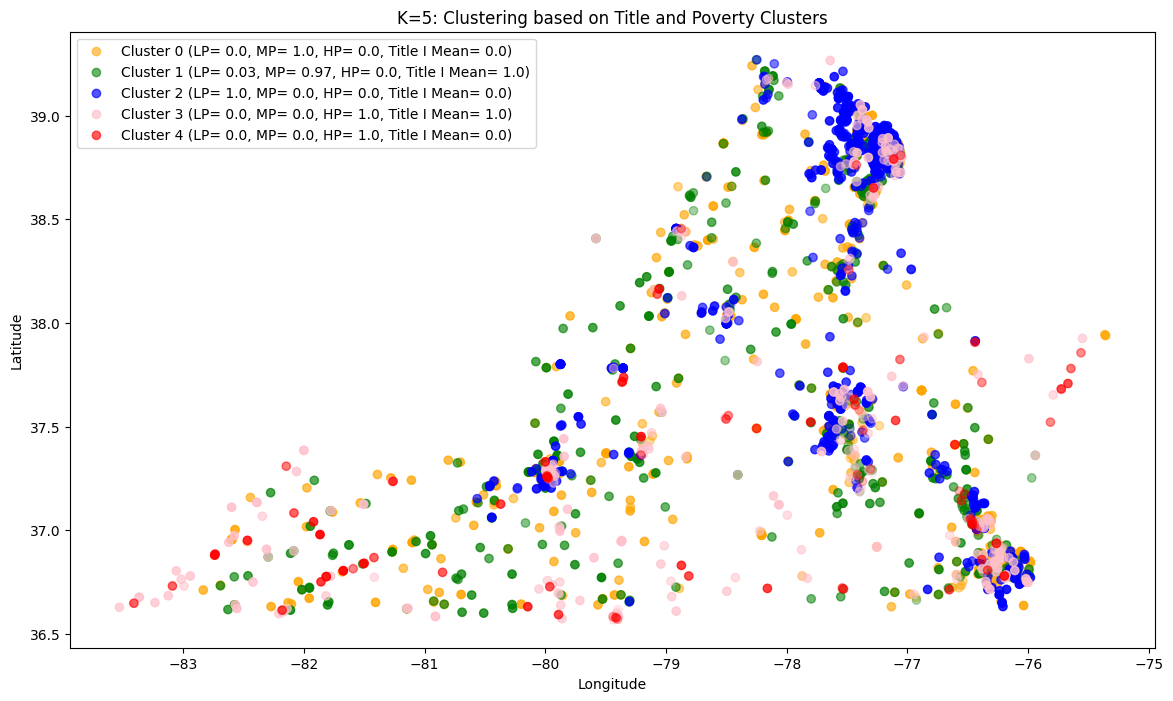

Cluster 0: 479 points
Cluster 1: 418 points
Cluster 2: 518 points
Cluster 3: 301 points
Cluster 4: 93 points


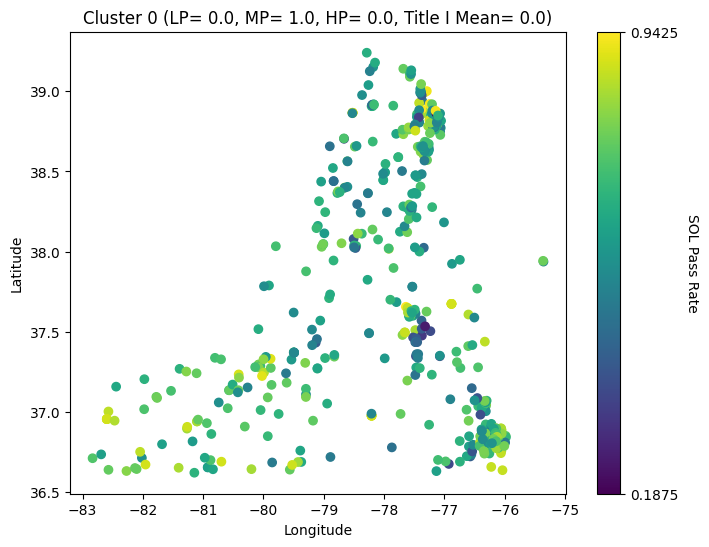

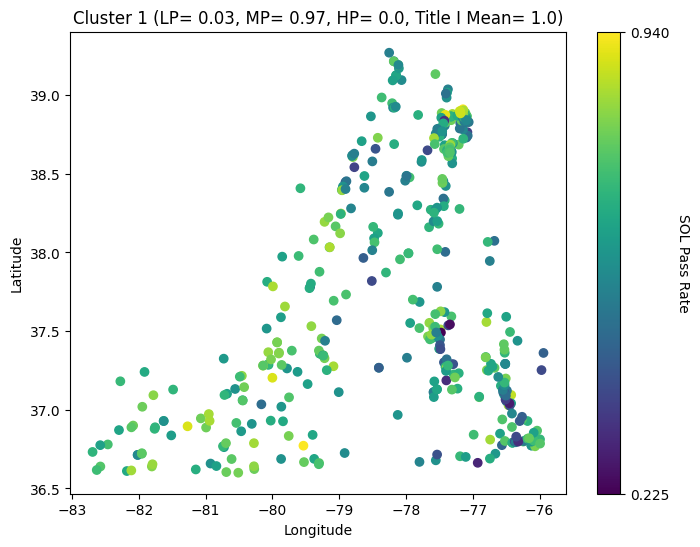

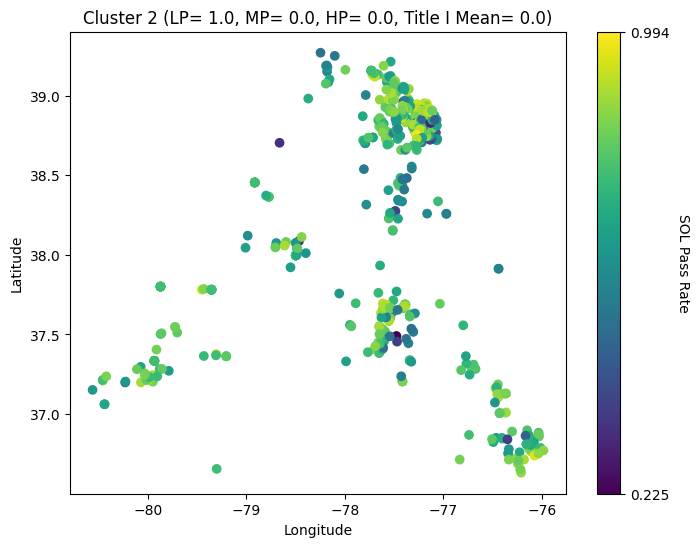

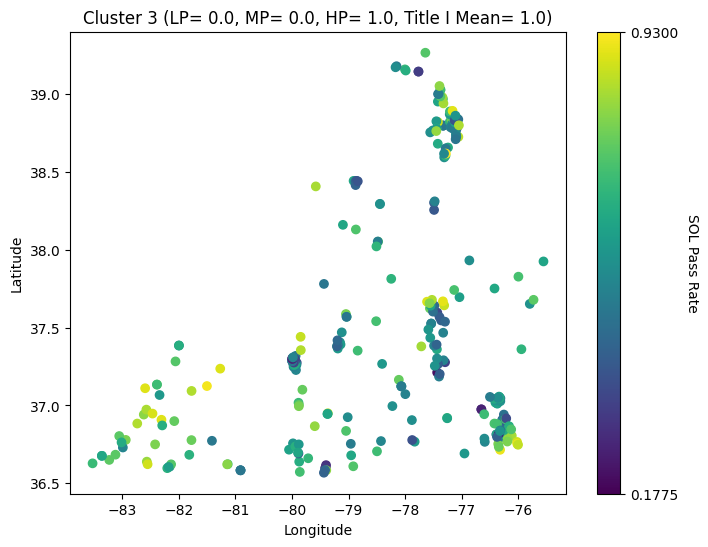

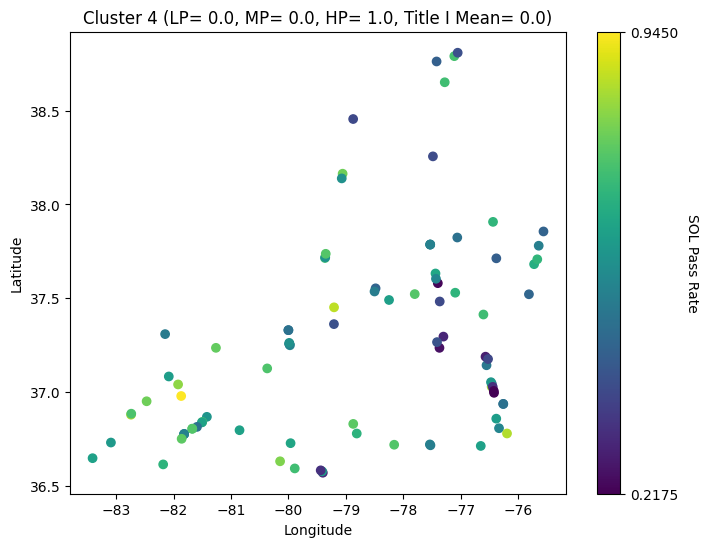

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_all_clusters(df, cluster_col, k, labels, colors, alpha_col):
    """
    Plot all clusters in a single graph with Longitude and Latitude.

    Parameters:
    - df: pd.DataFrame, the input dataframe.
    - cluster_col: str, the column name representing clusters.
    - k: int, the number of clusters.
    - labels: list of str, descriptive labels for each cluster.
    - colors: list of str, colors for each cluster.
    - alpha_col: str, column name representing the transparency (e.g., scaled values).
    """
    plt.figure(figsize=(14, 8))
    for cluster in range(k):
        cluster_data = df[df[cluster_col] == cluster]
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                    color=colors[cluster], alpha=cluster_data[alpha_col],
                    label=f'Cluster {cluster} ({labels[cluster]})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"K={k}: Clustering based on {cluster_col}")
    plt.legend()
    plt.show()

    cluster_counts = df[cluster_col].value_counts().sort_index()
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} points")

def plot_by_cluster(df, cluster_col, k, labels, alpha_col):
    """
    Plot each cluster in a separate graph with Longitude and Latitude.

    Parameters:
    - df: pd.DataFrame, the input dataframe.
    - cluster_col: str, the column name representing clusters.
    - k: int, the number of clusters.
    - labels: list of str, descriptive labels for each cluster.
    - alpha_col: str, column name representing the transparency (e.g., scaled values).
    """
    for cluster in range(k):
        cluster_data = df[df[cluster_col] == cluster]
        min_alpha = cluster_data[alpha_col].min()
        max_alpha = cluster_data[alpha_col].max()
        mean_alpha = cluster_data[alpha_col].mean()
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter( cluster_data['Longitude'], cluster_data['Latitude'],
            c=cluster_data[alpha_col],  # Use the alpha_col for color mapping
                               )
        cbar = plt.colorbar(scatter)
        cbar.set_label('SOL Pass Rate', rotation=270, labelpad=15)
        cbar.set_ticks([min_alpha, max_alpha])
        # plt.text(1.05, 0.5, f"Mean Pass Rate: {mean_alpha:.2f}",
        #  transform=plt.gca().transAxes,
        #  rotation=60,
        #  verticalalignment='center',
        #  fontsize=10)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Cluster {cluster} ({labels[cluster]})')
        plt.show()



#isolating just the title 1 feature
title_and_poverty_df= combined_df[['Title1_Code_Title I','Title1_Code_Non-Title I','Poverty_Level_Low Poverty','Poverty_Level_Medium Poverty','Poverty_Level_High Poverty','Latitude','Longitude','SOL Pass Rate']]
title_and_poverty_df['SOL_pass_rate_scaled'] = title_and_poverty_df[['SOL Pass Rate']]/100
#drop any na values- chose to drop instead of impute.
title_and_poverty_df= title_and_poverty_df.dropna()
#clustering only the features
just_features_df = title_and_poverty_df[['Title1_Code_Title I','Title1_Code_Non-Title I','Poverty_Level_Low Poverty','Poverty_Level_Medium Poverty','Poverty_Level_High Poverty']]


#now conducting my clustering
k=5
kmeans= KMeans(n_clusters=k)
clusters = kmeans.fit_predict(just_features_df)
#adding cluster index to the dataframe
title_and_poverty_df['Title and Poverty Clusters'] = clusters

#getting the mean poverty level and mean title 1 statistic as the graph label for each cluster.
labels= []
for cluster in range(k):
    cluster_data = title_and_poverty_df[title_and_poverty_df['Title and Poverty Clusters'] == cluster]
    low_poverty = round(cluster_data['Poverty_Level_Low Poverty'].mean(), 2)
    medium_poverty = round(cluster_data['Poverty_Level_Medium Poverty'].mean(), 2)
    high_poverty = round(cluster_data['Poverty_Level_High Poverty'].mean(), 2)
    # Calculate the proportions for Title I levels
    title_i_prop = round(cluster_data['Title1_Code_Title I'].mean(), 2)
    labels.append(f"LP= {low_poverty}, MP= {medium_poverty}, HP= {high_poverty}, Title I Mean= {title_i_prop}")

colors = ['orange', 'green','blue','pink','red']
plot_all_clusters(title_and_poverty_df, 'Title and Poverty Clusters', k, labels, colors, 'SOL_pass_rate_scaled')

plot_by_cluster(title_and_poverty_df, 'Title and Poverty Clusters', k, labels, 'SOL_pass_rate_scaled')



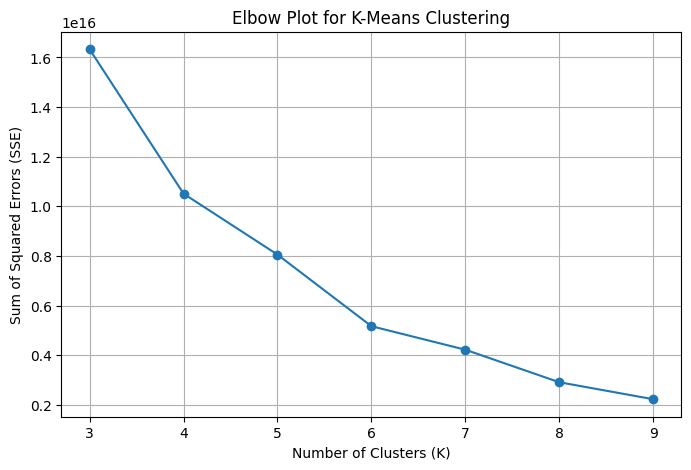

In [ ]:
all_features_df= combined_df
scores= all_features_df[['SOL Pass Rate']]
lat= all_features_df[['Latitude']]
long= all_features_df[['Longitude']]
all_features_df = all_features_df.drop(['SOL Pass Rate', 'School', 'Latitude', 'Longitude'], axis=1)
#drop any na values- chose to drop instead of impute.
all_features_df= all_features_df.dropna()

def elbow_plot(data):
  # creating an elbow plot to find the optimal value of k.
  sse = []

  # Define the range of K values
  k_values = range(3, 10)

  # Loop through each K value
  for k in k_values:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(data)
      sse.append(kmeans.inertia_)  # Append SSE (inertia)

  # Plot the elbow plot
  plt.figure(figsize=(8, 5))
  plt.plot(k_values, sse, marker='o')
  plt.title('Elbow Plot for K-Means Clustering')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Sum of Squared Errors (SSE)')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

elbow_plot(all_features_df)

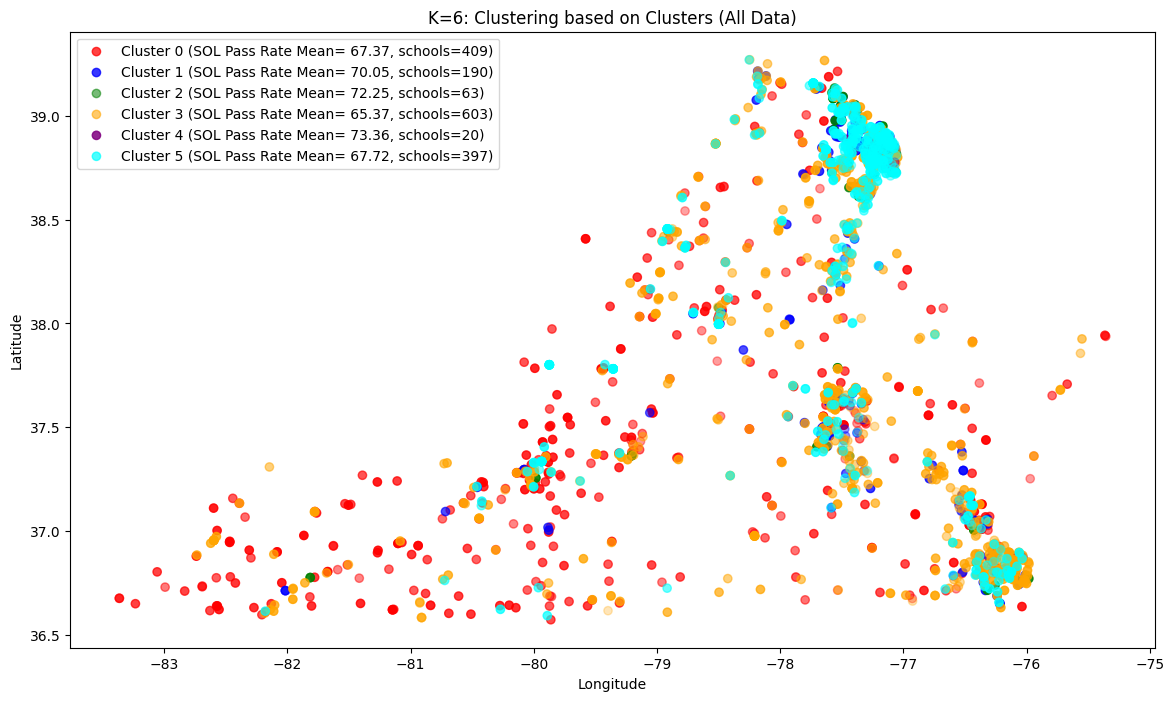

Cluster 0: 409 points
Cluster 1: 190 points
Cluster 2: 63 points
Cluster 3: 603 points
Cluster 4: 20 points
Cluster 5: 397 points


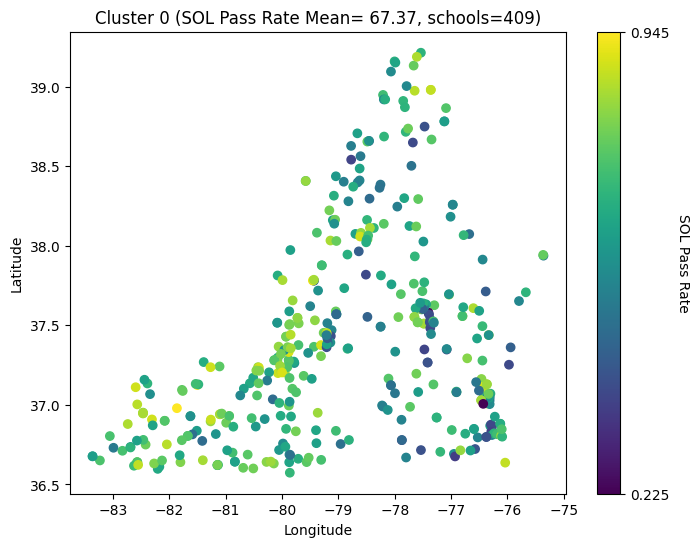

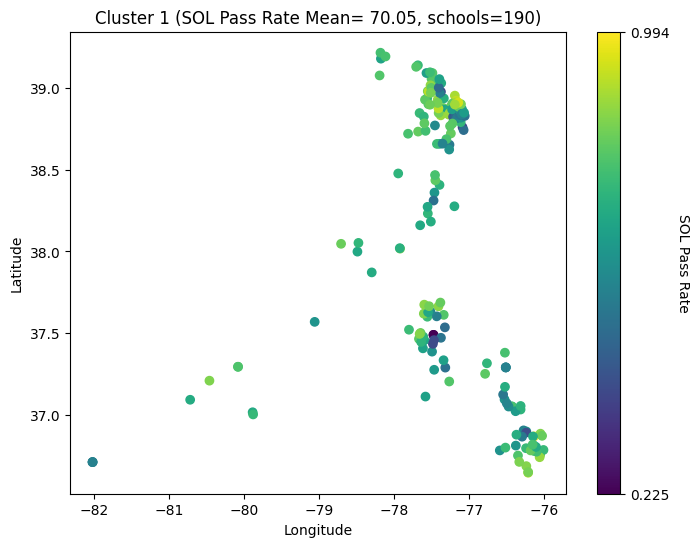

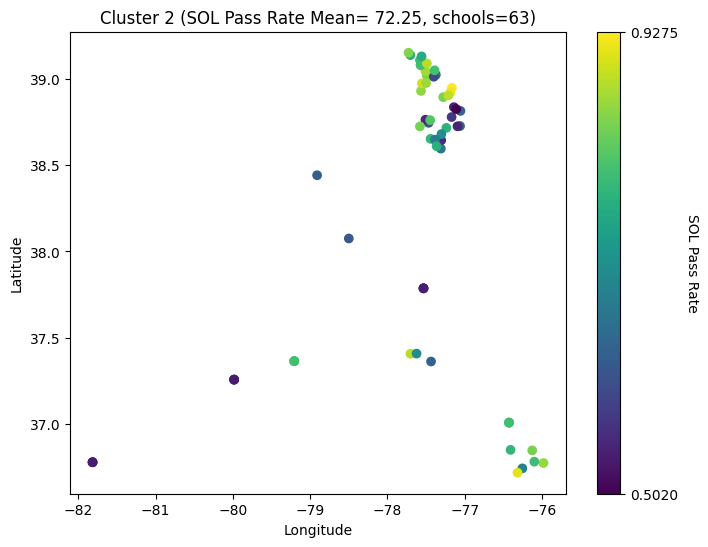

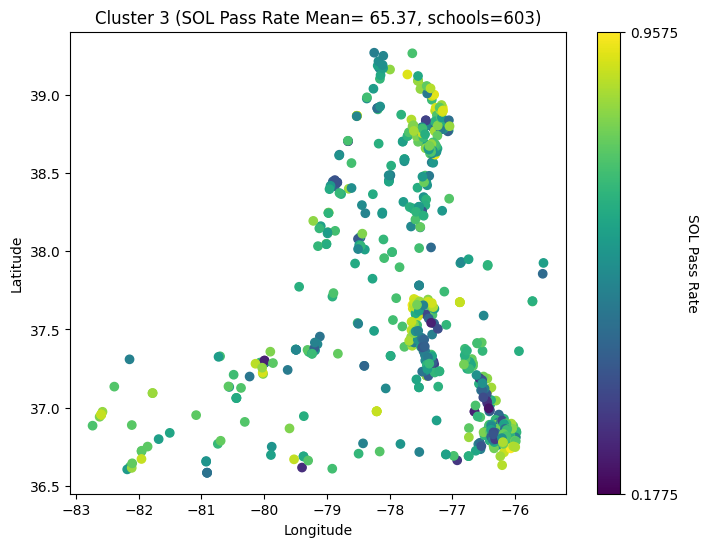

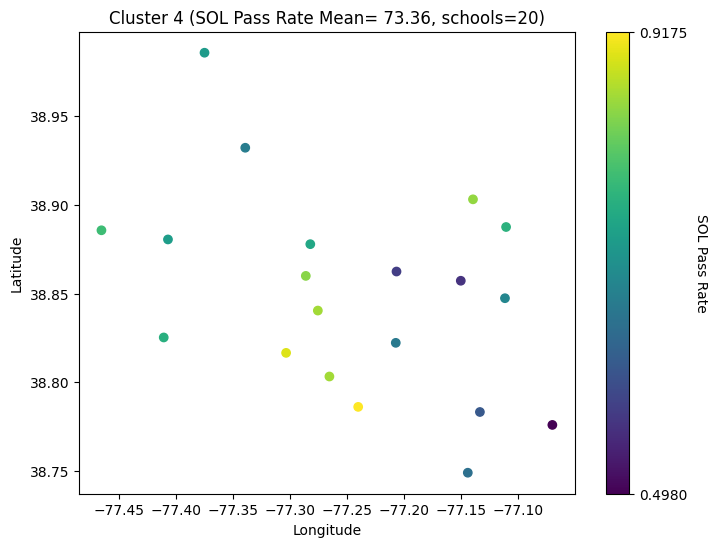

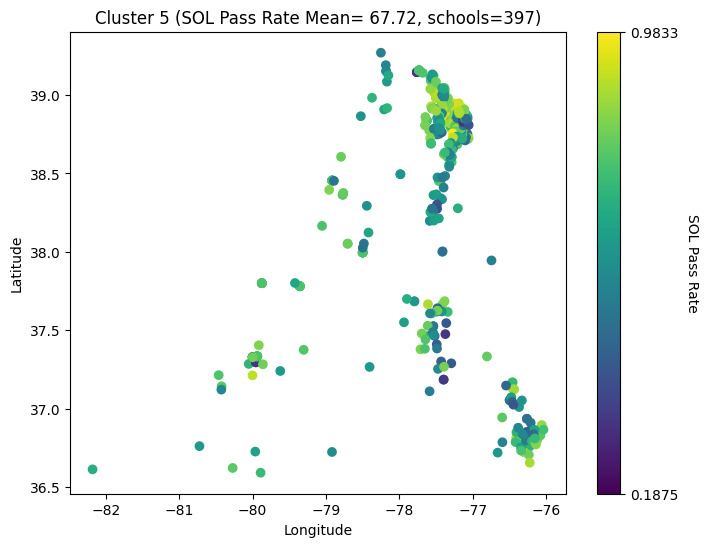

In [ ]:
#now clustering using all features in the dataframe and optimal K

k=6
kmeans2= KMeans(n_clusters=k)
clusters = kmeans2.fit_predict(all_features_df)
#add cluster index to dataframe
all_features_df['Clusters (All Data)'] = clusters
#add back scores and location
all_features_df['SOL Pass Rate'] = scores
all_features_df['Latitude'] = lat
all_features_df['Longitude'] = long

#make a label for each cluster
labels= []
for cluster in range(k):
    cluster_data = all_features_df[all_features_df['Clusters (All Data)'] == cluster]
    sol_rate = round(cluster_data['SOL Pass Rate'].mean(), 2)
    school_count= len(cluster_data)
    labels.append(f"SOL Pass Rate Mean= {sol_rate}, schools={school_count}")
#scaling SOL pass rate
all_features_df['SOL_pass_rate_scaled'] = all_features_df[['SOL Pass Rate']]/100


colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

plot_all_clusters(all_features_df, 'Clusters (All Data)', k, labels, colors, 'SOL_pass_rate_scaled')

plot_by_cluster(all_features_df, 'Clusters (All Data)', k, labels, 'SOL_pass_rate_scaled')

In [ ]:
#clustering using the top features from the correlational matrix
top_features_df= combined_df[['% Not Economically Disadvantaged','% White, not of Hispanic origin','Reduced_Lunch_Eligibility_Percent','% Black, not of Hispanic origin','Chronic_Absenteeism_Rate','Latitude','Longitude','SOL Pass Rate']]
scores= top_features_df[['SOL Pass Rate']]
lat= top_features_df[['Latitude']]
long= top_features_df[['Longitude']]
top_features_df = top_features_df.drop(['SOL Pass Rate', 'Latitude', 'Longitude'], axis=1)
# elbow_plot(top_features_df)

k=6
kmeans3= KMeans(n_clusters=k)
clusters = kmeans3.fit_predict(top_features_df)

top_features_df['Clusters (Top Data)'] = clusters
#add back scores and location
top_features_df['SOL Pass Rate'] = scores
top_features_df['Latitude'] = lat
top_features_df['Longitude'] = long

#make a label for each cluster
labels= []
for cluster in range(k):
    cluster_data = top_features_df[top_features_df['Clusters (Top Features)'] == cluster]
    sol_rate = round(cluster_data['SOL Pass Rate'].mean(), 2)
    school_count= len(cluster_data)
    labels.append(f"SOL Pass Rate Mean= {sol_rate}, schools={school_count}")
#scaling SOL pass rate
top_features_df['SOL_pass_rate_scaled'] = top_features_df[['SOL Pass Rate']]/100


colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

plot_all_clusters(top_features_df, 'Clusters (Top Features)', k, labels, colors, 'SOL_pass_rate_scaled')

plot_by_cluster(top_features_df, 'Clusters (Top Features)', k, labels, 'SOL_pass_rate_scaled')

# NEURAL NETWORK

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 4564.6953 - mae: 65.9706 - val_loss: 4525.1562 - val_mae: 65.6379
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4138.1553 - mae: 62.8043 - val_loss: 4004.5469 - val_mae: 61.8966
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3485.5974 - mae: 57.8274 - val_loss: 2933.5718 - val_mae: 53.1431
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2472.2932 - mae: 48.3380 - val_loss: 1637.5265 - val_mae: 38.6076
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1379.7396 - mae: 34.5468 - val_loss: 739.6909 - val_mae: 23.2652
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 630.0287 - mae: 20.7092 - val_loss: 327.0773 - val_mae: 13.1498
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 344.7676 - mae: 14.2792 - val_loss: 190.5017 - val_mae: 9.5499
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 222.6578 - mae: 11.4693 - val_loss: 150.5539 - val_mae: 8.6050
Epoch 9/50
37/37 ━━━━━━━━━━

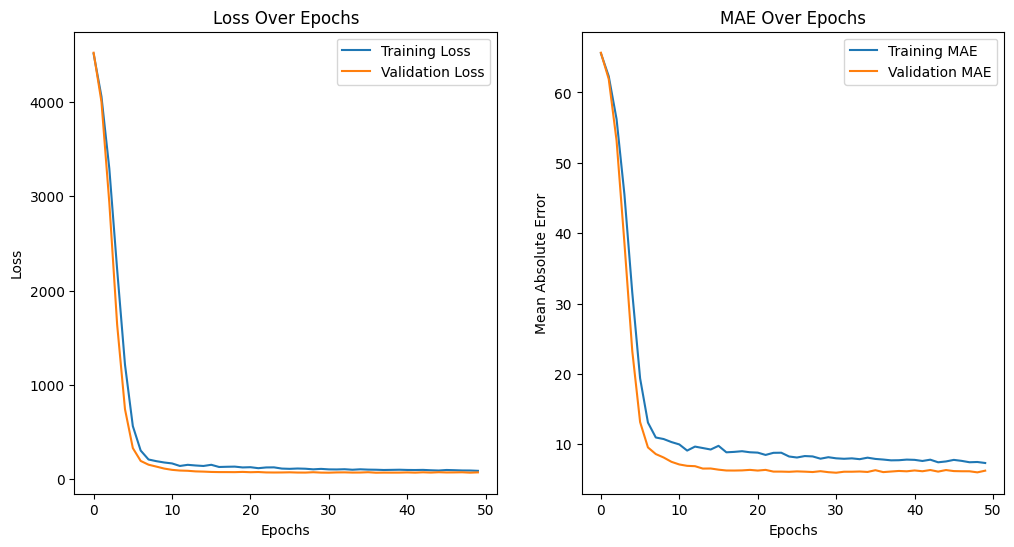

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
y = combined_df['SOL Pass Rate']
X = combined_df.drop(['SOL Pass Rate', 'School'], axis=1, errors='ignore')

# Select only numerical columns
X = X.select_dtypes(include=[np.number])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network
def create_custom_model(input_dim):
    model = Sequential()

    # Input layer
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())  # Helps with faster convergence
    model.add(Dropout(0.2))  # Regularization to prevent overfitting

    # Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    return model

# Create the model
input_dim = X_train.shape[1]
model = create_custom_model(input_dim)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=50,  # Adjust epochs as needed
    batch_size=32,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()
